

# Project: Investigate a Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Investigate a movie dataset to find the common thing for a good movie as well as some of their charateristic to be able to make the highest rating or profit. Here are my curious question that I am seeking to answer based on this data
1. How did the customer rating of those movies change from the past to present?
2. What is the sweet spot for a movie length? (of which they make the most revenue)

Firsly, I imported some libraries that needed for the analysis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Secondly, we read the data from CSV file, then we take a look at some of the rows in the top of the files

In [20]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To see how many rows and columns it has

In [21]:
df.shape

(10866, 21)

To look at the data by its count, mean, standard deviation, ...

In [22]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Taking a look at the data info to see how many cell are missing, NA or zeros

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Replace this with more specific notes!)

Dropping some unnecessary columns

In [24]:
df.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

To see if these columns are all gone

In [25]:
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015


To see how much data is missing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 679.2+ KB


Taking a look at the cell where there are NaN values

In [27]:
df[df.genres.isnull()]

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
424,0.244648,0,0,100,NaN,21,6.1,2015
620,0.129696,0,0,90,NaN,13,5.0,2015
997,0.330431,0,0,44,NaN,13,6.8,2014
1712,0.302095,0,0,88,NaN,57,7.4,2009
1897,0.020701,0,0,76,NaN,11,7.0,2009
2370,0.081892,0,0,0,NaN,12,5.8,2010
2376,0.068411,0,0,62,NaN,11,7.7,2010
2853,0.130018,0,0,110,NaN,12,7.2,2001
3279,0.145331,0,0,96,NaN,11,6.1,2008
4547,0.520520,0,0,220,NaN,12,8.3,2012


Removing those NaN cells

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10843 non-null float64
budget          10843 non-null int64
revenue         10843 non-null int64
runtime         10843 non-null int64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 762.4+ KB


Taking a general look at the data by histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53a1b6dcc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f53a56d30f0>]], dtype=object)

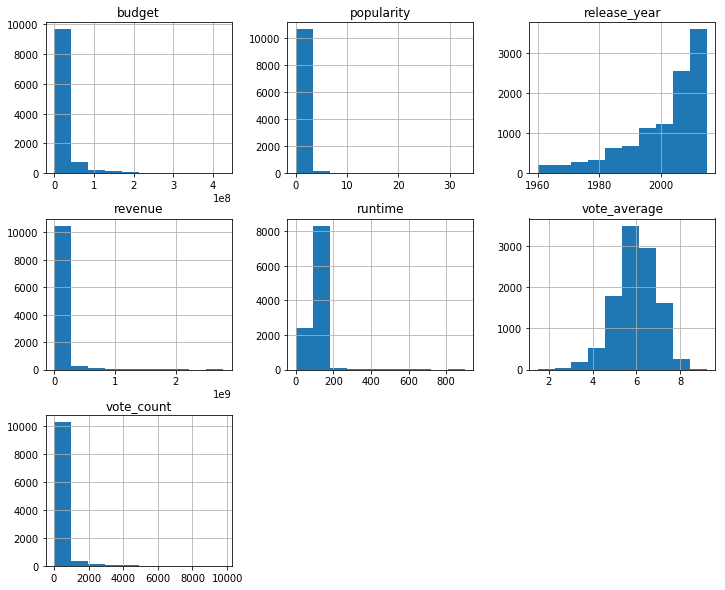

In [30]:
df.hist(figsize=(12,10))

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: How did the customer rating of those movies change from the past to present?

I create a scatter plot to show the relation between 'release_year' and 'vote_average'. It is better to use scatter plot than any other kinds of graph for this situation

Text(0.5,0,'Releasing Year')

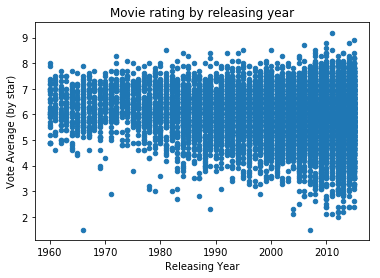

In [37]:
df1 = df.plot(x='release_year', y = 'vote_average', kind = 'scatter',title='Movie rating by releasing year')
df1.set_ylabel('Vote Average (by star)')
df1.set_xlabel('Releasing Year')

Answer: As illustrated in the scatter graph, recently released movies come with both higher and lower range of rating point compared to the old movies. In other words, customer rating are now more diversity than that of the past.
More ever, in the other hand, it seems like we have more worse movie than better movies releasing than that of the past

### Research Question 2: What is the sweet spot for a movie length? (of which they make the most revenue)

To answer this question, I demostate the relation between 'runtime' and 'revenue' by this graph. It is better to use scatter plot than any other kinds of graph for this situation

Text(0,0.5,'Revenue (Billion Dollar)')

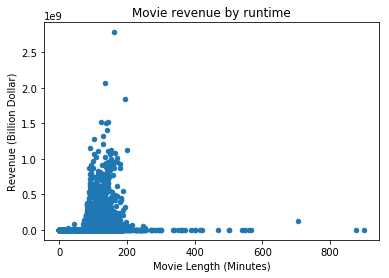

In [41]:
df2 = df.plot(x = 'runtime', y='revenue', kind='scatter', title='Movie revenue by runtime')
df2.set_xlabel('Movie Length (Minutes)')
df2.set_ylabel('Revenue (Billion Dollar)')

As demostrated by the graph, the most profitable movies were created in between 130 to 200 minutes. This is where the dots stay at the highest density level

<a id='conclusions'></a>
## Conclusions

The dataset seems like providing me enough information to answer my questions. 

Based on my investigation, customer rating are now more diversity than that of the past with the old movie rating average is a little higher than nowaday's movie.

To get the most of of profit, a movie should go between 130 to 200 minutes. This charateristic are pretty accurate because it based on a large amount of movies investigated

Convert file command:

In [150]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0